In [ ]:
!pip install -qqq keras_ocr

In [ ]:
import string
from tqdm.notebook import trange
import keras_ocr

In [ ]:
pretrained_recognizer = keras_ocr.recognition.Recognizer()

recognizer_weight_path = "/content/drive/Shareddrives/วิสัยทัศน์สมองกล/keras_ocr/checkpoints/version_2/recognizer.h5"
alphabet = string.ascii_letters + '!"\'(),-.:;?[]'
recognizer_alphabet = ''.join(sorted(set(alphabet.lower())))
trained_recognizer = keras_ocr.recognition.Recognizer(alphabet=recognizer_alphabet)
trained_recognizer.model.load_weights(recognizer_weight_path)

In [ ]:
test_dataset = keras_ocr.datasets.get_icdar_2013_recognizer_dataset()
test_data = [(filepath, box, word.lower()) for filepath, box, word in test_dataset if word.isalpha()]

image_generator = keras_ocr.datasets.get_recognizer_image_generator(
    labels=test_data,
    height=trained_recognizer.model.input_shape[1],
    width=trained_recognizer.model.input_shape[2],
    alphabet=sorted(set(string.ascii_letters.lower())),
    shuffle=False,
)

In [ ]:
pretrained_num_correct = 0
trained_num_correct = 0
num_data = 0

pretrained_preds = []
trained_preds = []
labels = []
indices = []

for idx in trange(len(test_data)):
    image, label = next(image_generator)
    pretrained_pred = pretrained_recognizer.recognize(image)
    trained_pred = trained_recognizer.recognize(image)
    pretrained_correct =  pretrained_pred == label
    trained_correct = trained_pred == label
    if pretrained_correct:
        pretrained_num_correct += 1
    if trained_correct:
        trained_num_correct += 1
    if not pretrained_correct or not trained_correct:
        pretrained_preds.append(pretrained_pred)
        trained_preds.append(trained_pred)
        labels.append(label)
        indices.append(idx)
    num_data += 1

print(f"Pretrained Model Accuracy: {pretrained_num_correct / num_data}")
print(f"Trained Model Accuracy: {trained_num_correct / num_data}")

  0%|          | 0/720 [00:00<?, ?it/s]

Pretrained Model Accuracy: 0.6
Trained Model Accuracy: 0.775


In [ ]:
import pandas as pd

df = pd.DataFrame({
    'indices': indices,
    'pretrained': pretrained_preds,
    'trained': trained_preds,
    'label': labels,
})

df.to_csv('eval.csv', index=False)

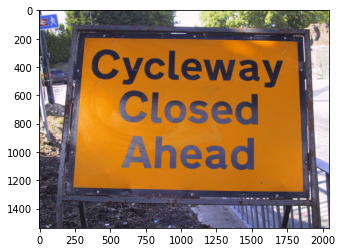

In [ ]:
import matplotlib.pyplot as plt
from PIL import Image

plt.imshow(Image.open(test_data[0][0]).convert('RGB'))
plt.show()